# Importing Necessary Libraries

In [ ]:
import pandas as pd # type: ignore # type: ignored 
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # type: ignore
import joblib # type: ignore

# Load The Dataset

In [ ]:
file_path = 'Human Stress Dataset (Kaggle).csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,1
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,1
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,0
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,1
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
df.shape

(630, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Snoring Rate      630 non-null    float64
 1   Respiratory Rate  630 non-null    float64
 2   Body Temperature  630 non-null    float64
 3   Limb Movement     630 non-null    float64
 4   Blood Oxygen      630 non-null    float64
 5   Eye Movement      630 non-null    float64
 6   Sleep Hours       630 non-null    float64
 7   Heart Rate        630 non-null    float64
 8   Stress Levels     630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [ ]:
df.describe()

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate,Stress Levels
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,0.600000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,0.490287
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,0.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,1.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,1.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,1.000000


In [ ]:
df.isna().sum()

Snoring Rate        0
Respiratory Rate    0
Body Temperature    0
Limb Movement       0
Blood Oxygen        0
Eye Movement        0
Sleep Hours         0
Heart Rate          0
Stress Levels       0
dtype: int64

# Data Visualizations

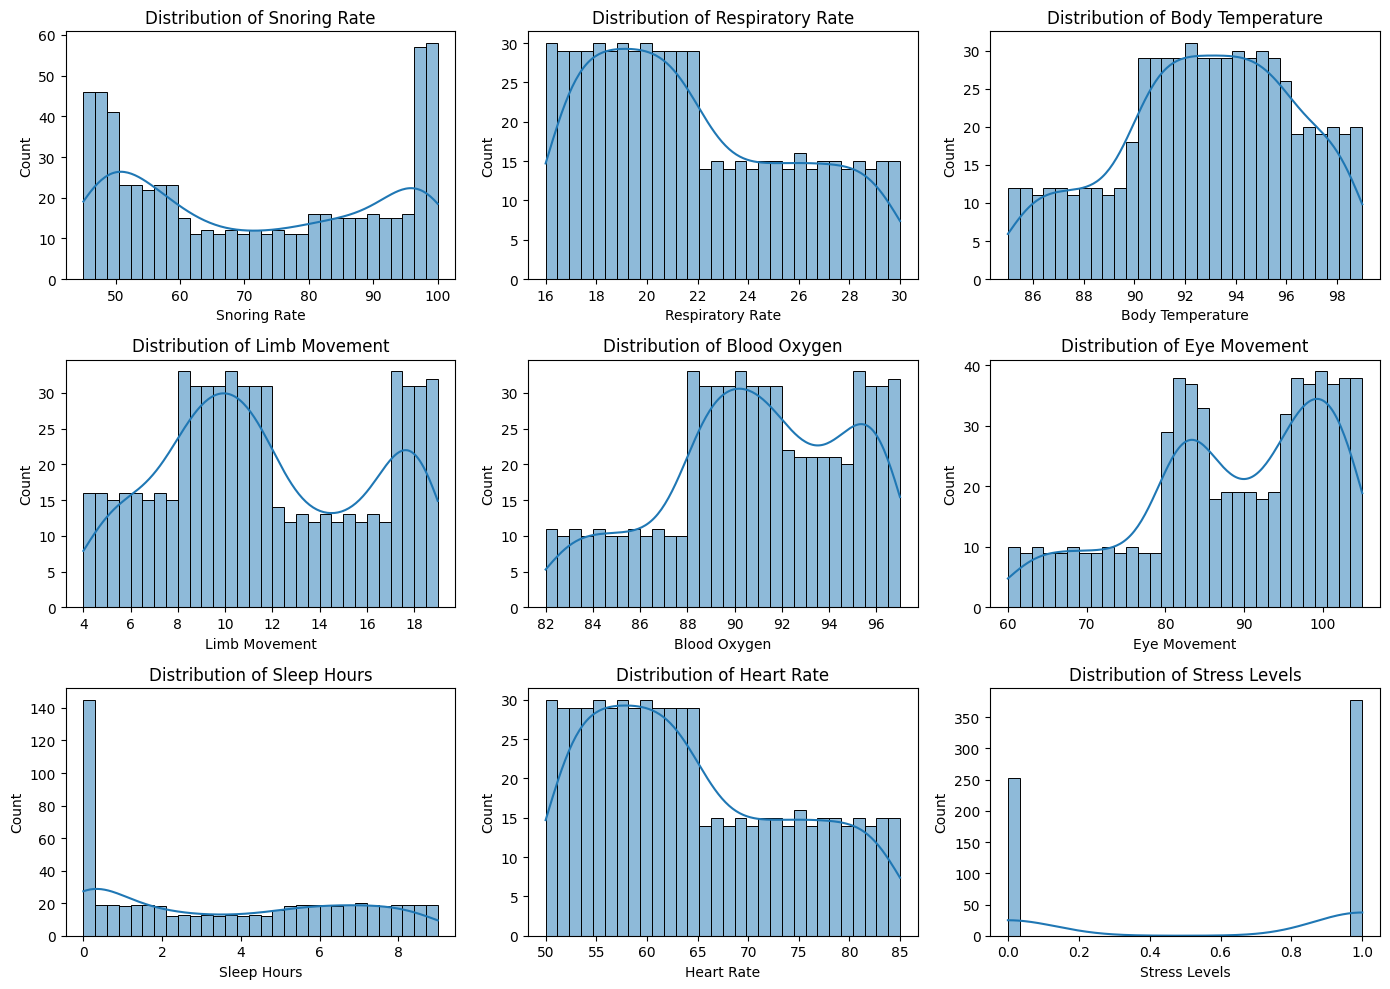

In [8]:
# Distribution plot for each feature
plt.figure(figsize=(14, 10))

# List of columns to plot
columns = ['Snoring Rate', 'Respiratory Rate', 'Body Temperature', 'Limb Movement', 
           'Blood Oxygen', 'Eye Movement', 'Sleep Hours', 
           'Heart Rate', 'Stress Levels']

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Changed to 3x3 grid (9 slots)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

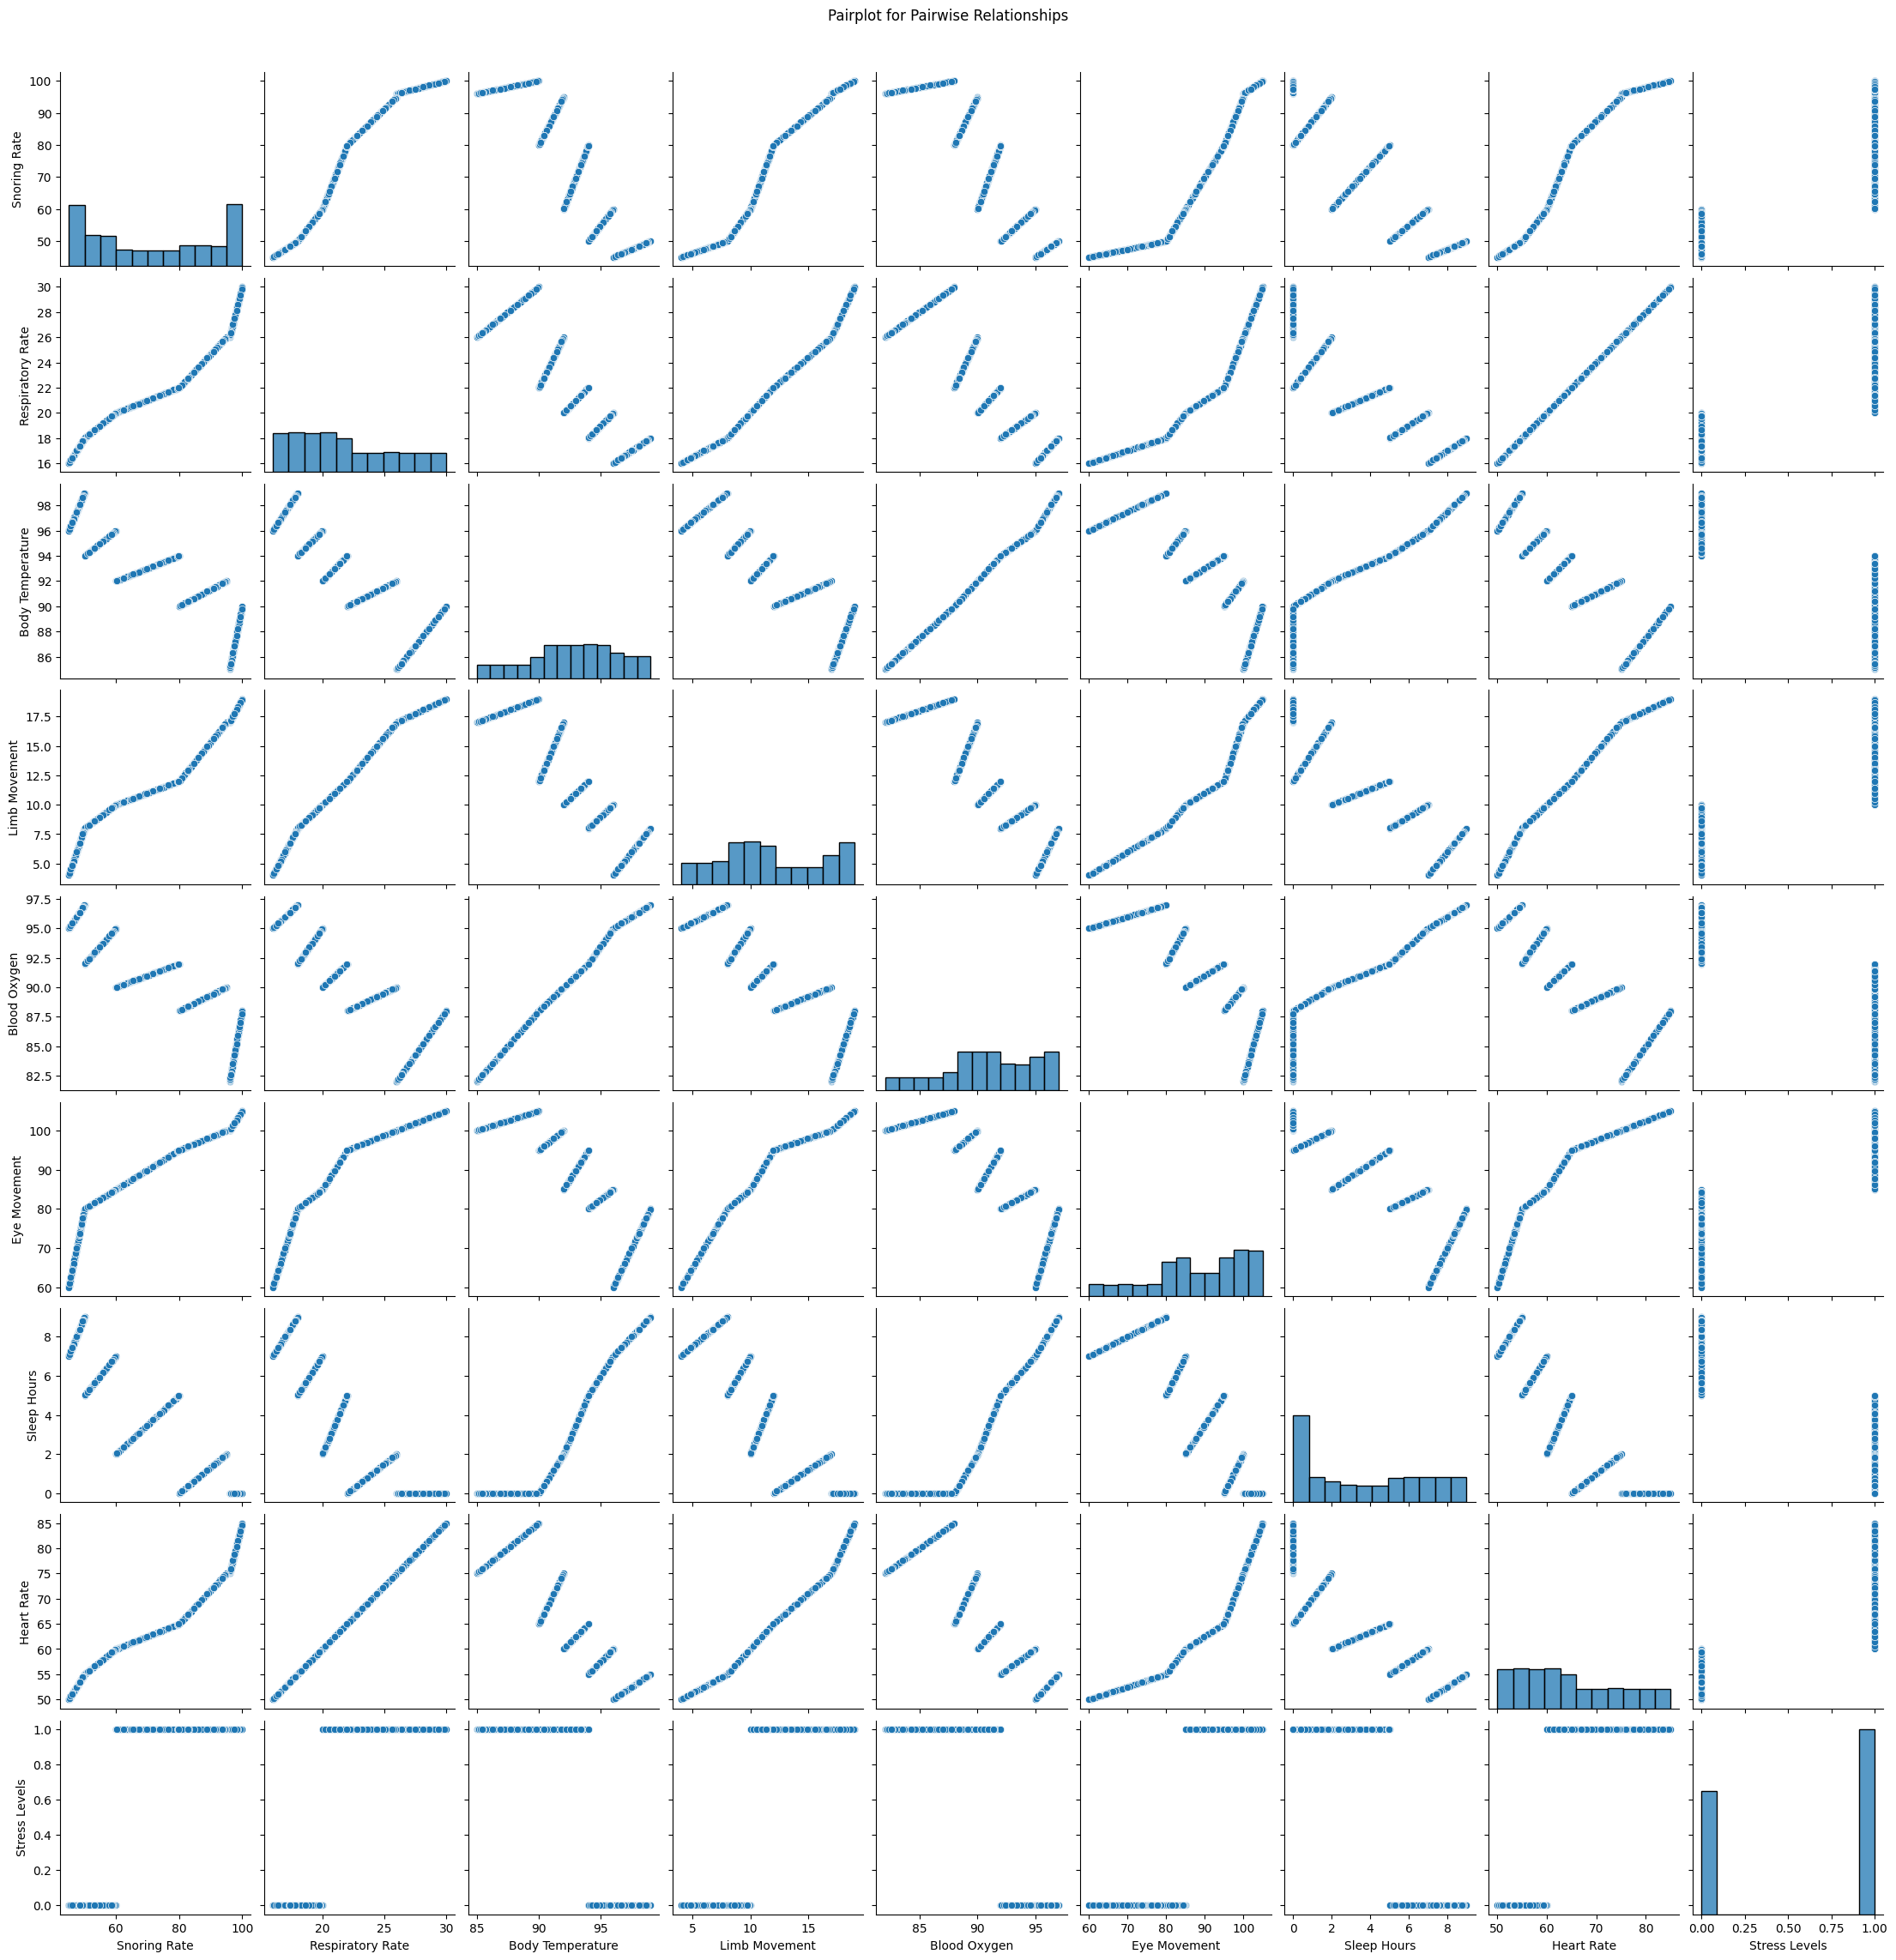

In [9]:
# plot Pairplot for pairwise relationships
sns.pairplot(df)
plt.suptitle('Pairplot for Pairwise Relationships', y=1.02)
plt.show()

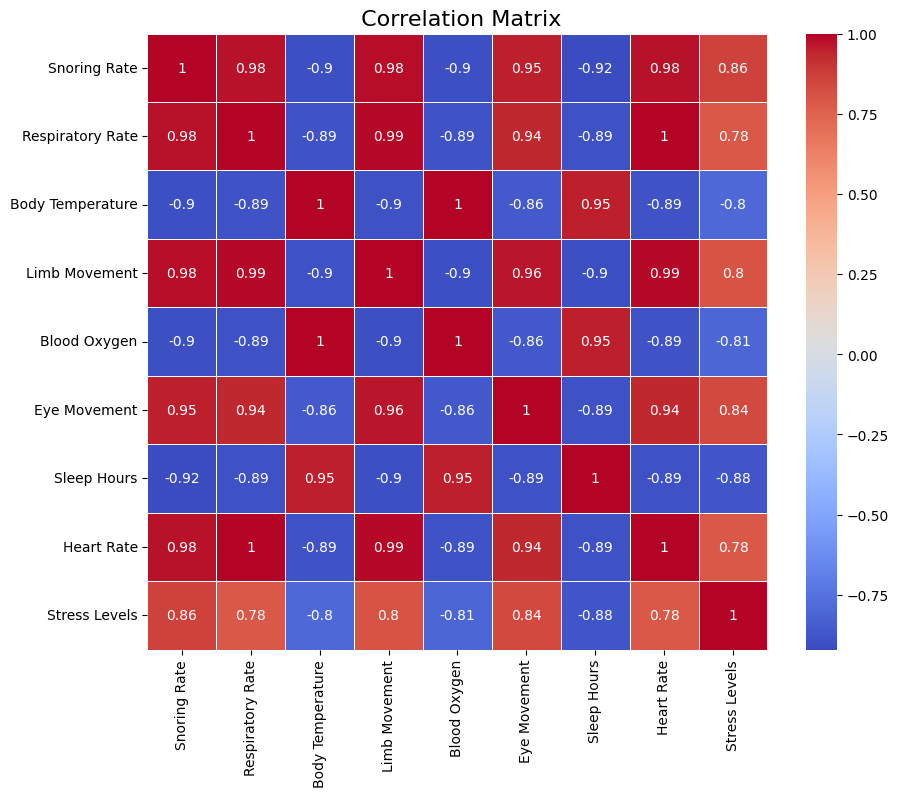

In [10]:
# Correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(' Correlation Matrix', fontsize=16)
plt.show()

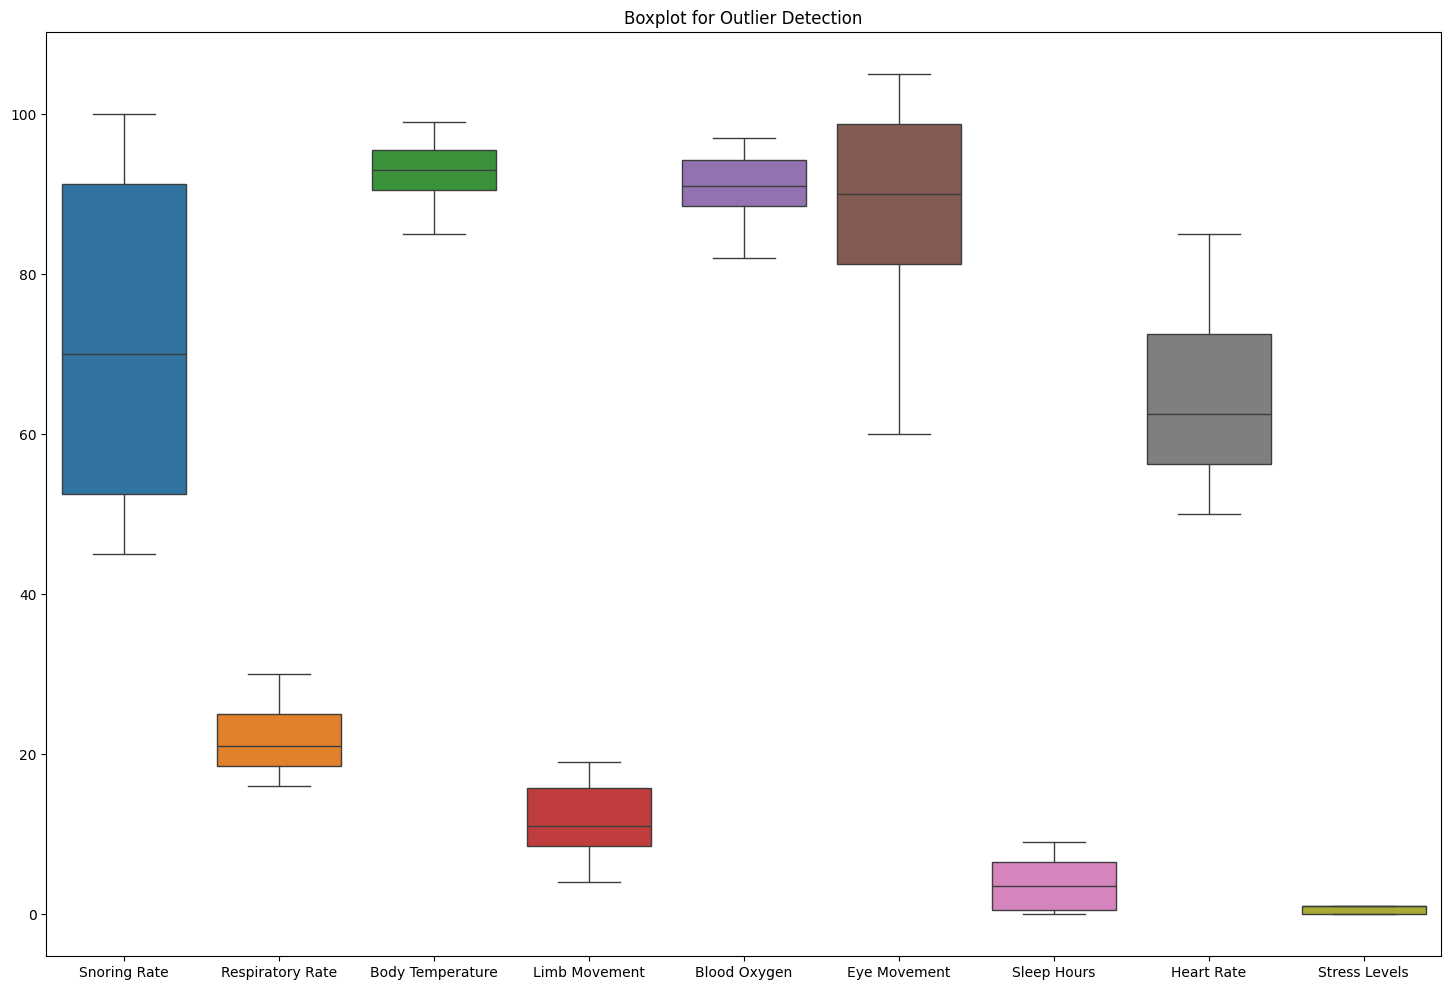

In [11]:
# Boxplot for outlier detection
plt.figure(figsize=(18, 12))
sns.boxplot(data=df[columns])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [12]:
X = df.drop('Stress Levels', axis=1)   # type: ignore
y = df['Stress Levels'] # type: ignore

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalize the features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [15]:
# Create the Logistic Regression model

model = LogisticRegression()

In [16]:
# Train the model

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
# Make predictions

y_pred = model.predict(X_test_scaled)

In [18]:
# Evaluation metrics

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

 

print(f'Accuracy: {accuracy:.2f}')

print(f'Precision: {precision:.2f}')

print(f'Recall: {recall:.2f}')

print(f'F1-Score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


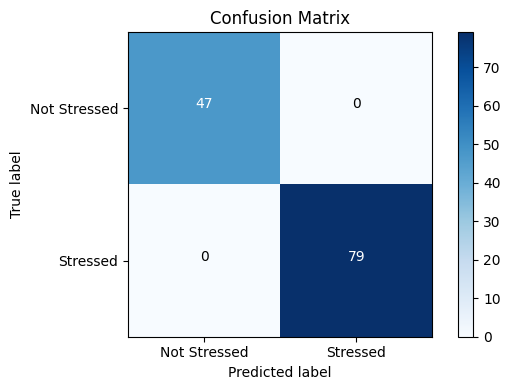

In [19]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

 

plt.figure(figsize=(6, 4))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

plt.title('Confusion Matrix')

plt.colorbar()

tick_marks = np.arange(2)

plt.xticks(tick_marks, ['Not Stressed', 'Stressed'])

plt.yticks(tick_marks, ['Not Stressed', 'Stressed'])

thresh = cm.max() / 2

for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [20]:
joblib.dump(model, 'stress_detection_model.pkl')

['stress_detection_model.pkl']